In [1]:
cd /Users/leayamashiro/whispering_gallery_MAIN/WGM_clean

/Users/leayamashiro/whispering_gallery_MAIN/WGM_clean


In [2]:
import numpy as np
import pandas as pd 
import cmath 
import glob
import scipy.special as sp
import scipy.signal as spg
import scipy.constants as const
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['legend.fontsize'] = 8
#import VNA_data_read_local as vdr


import sys
sys.path.append('/Users/leayamashiro/whispering_gallery_MAIN/wgm_code/Q_fac_analysis/')
import useful_functions as uf
#sys.path.append('/Users/leayamashiro/whispering_gallery_MAIN/WGM_clean/analysis_060225')
import VNA_data_read_local as vdr
# loading file folder
rot_060325 = glob.glob('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/*.txt')
rot_060325

['/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rot1_5mm_2.5to6.18GHz_2025-06-03_15-47-10.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rot1_2.5mm_2.5to6.18GHz_2025-06-03_15-45-09.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/baseline1_060325_2.5to6.18GHz_2025-06-03_15-52-59.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rot1_10mm_2.5to6.18GHz_2025-06-03_15-51-29.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rot1_7.5mm_2.5to6.18GHz_2025-06-03_15-49-54.txt']

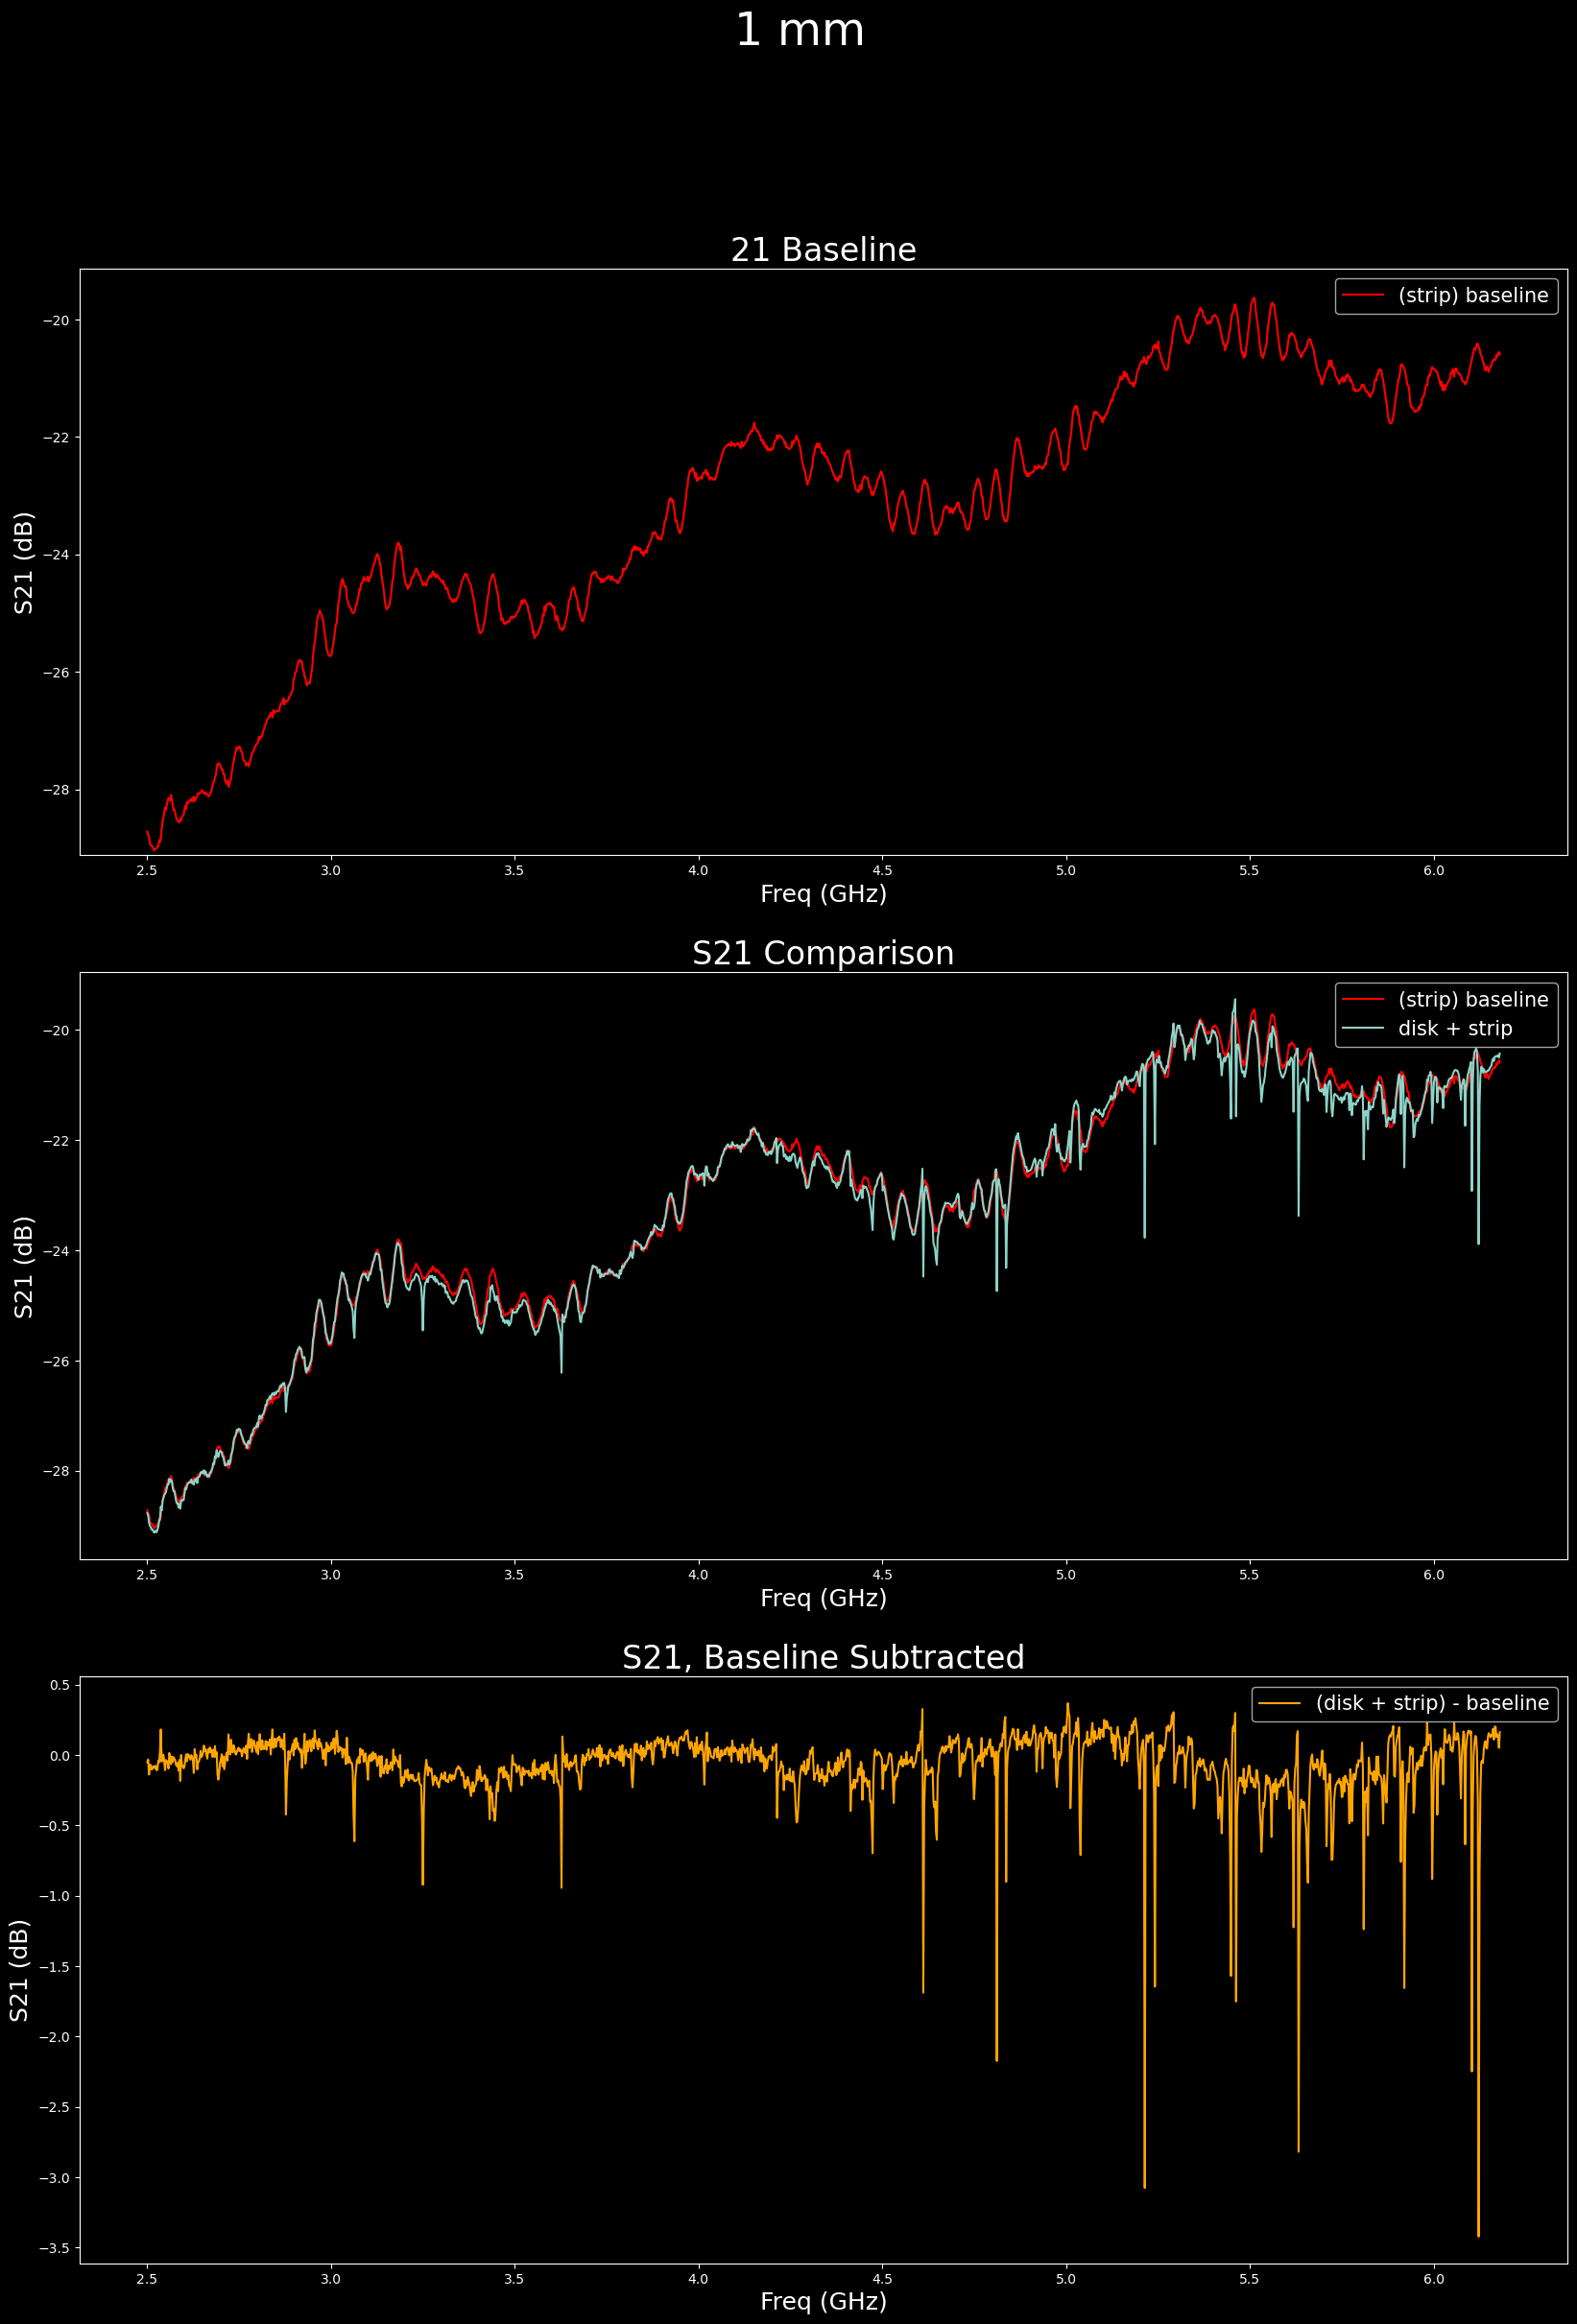

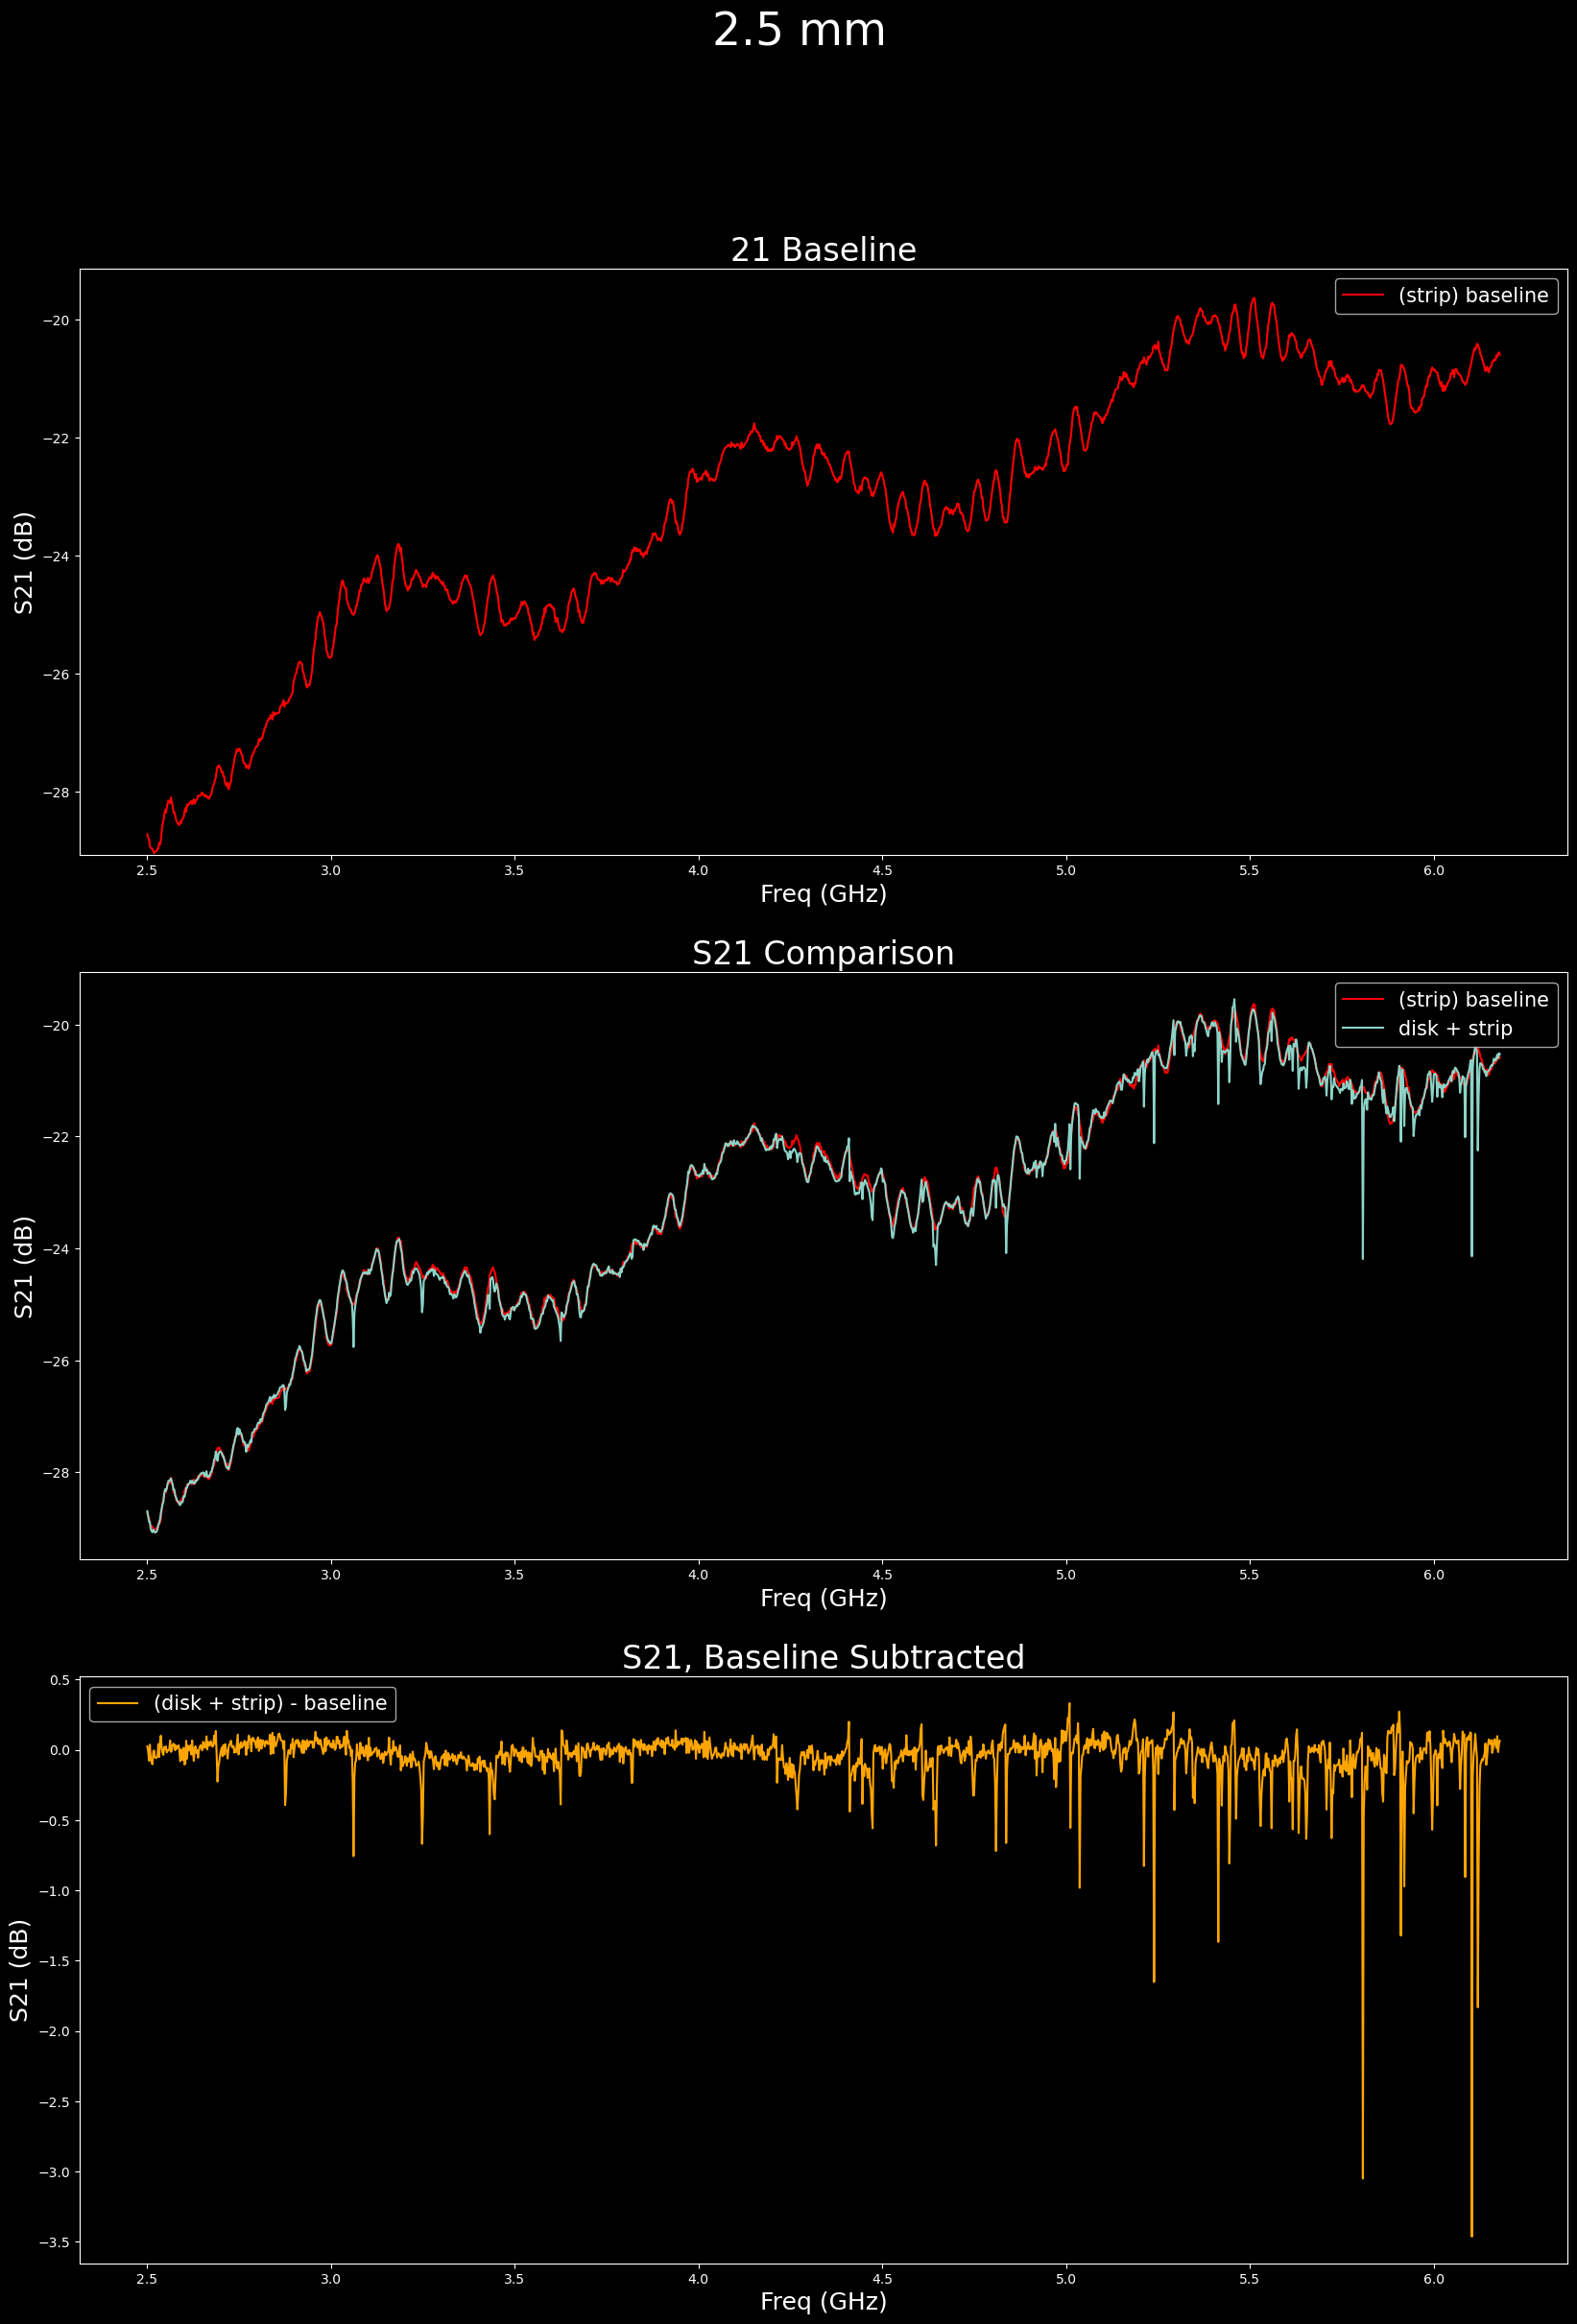

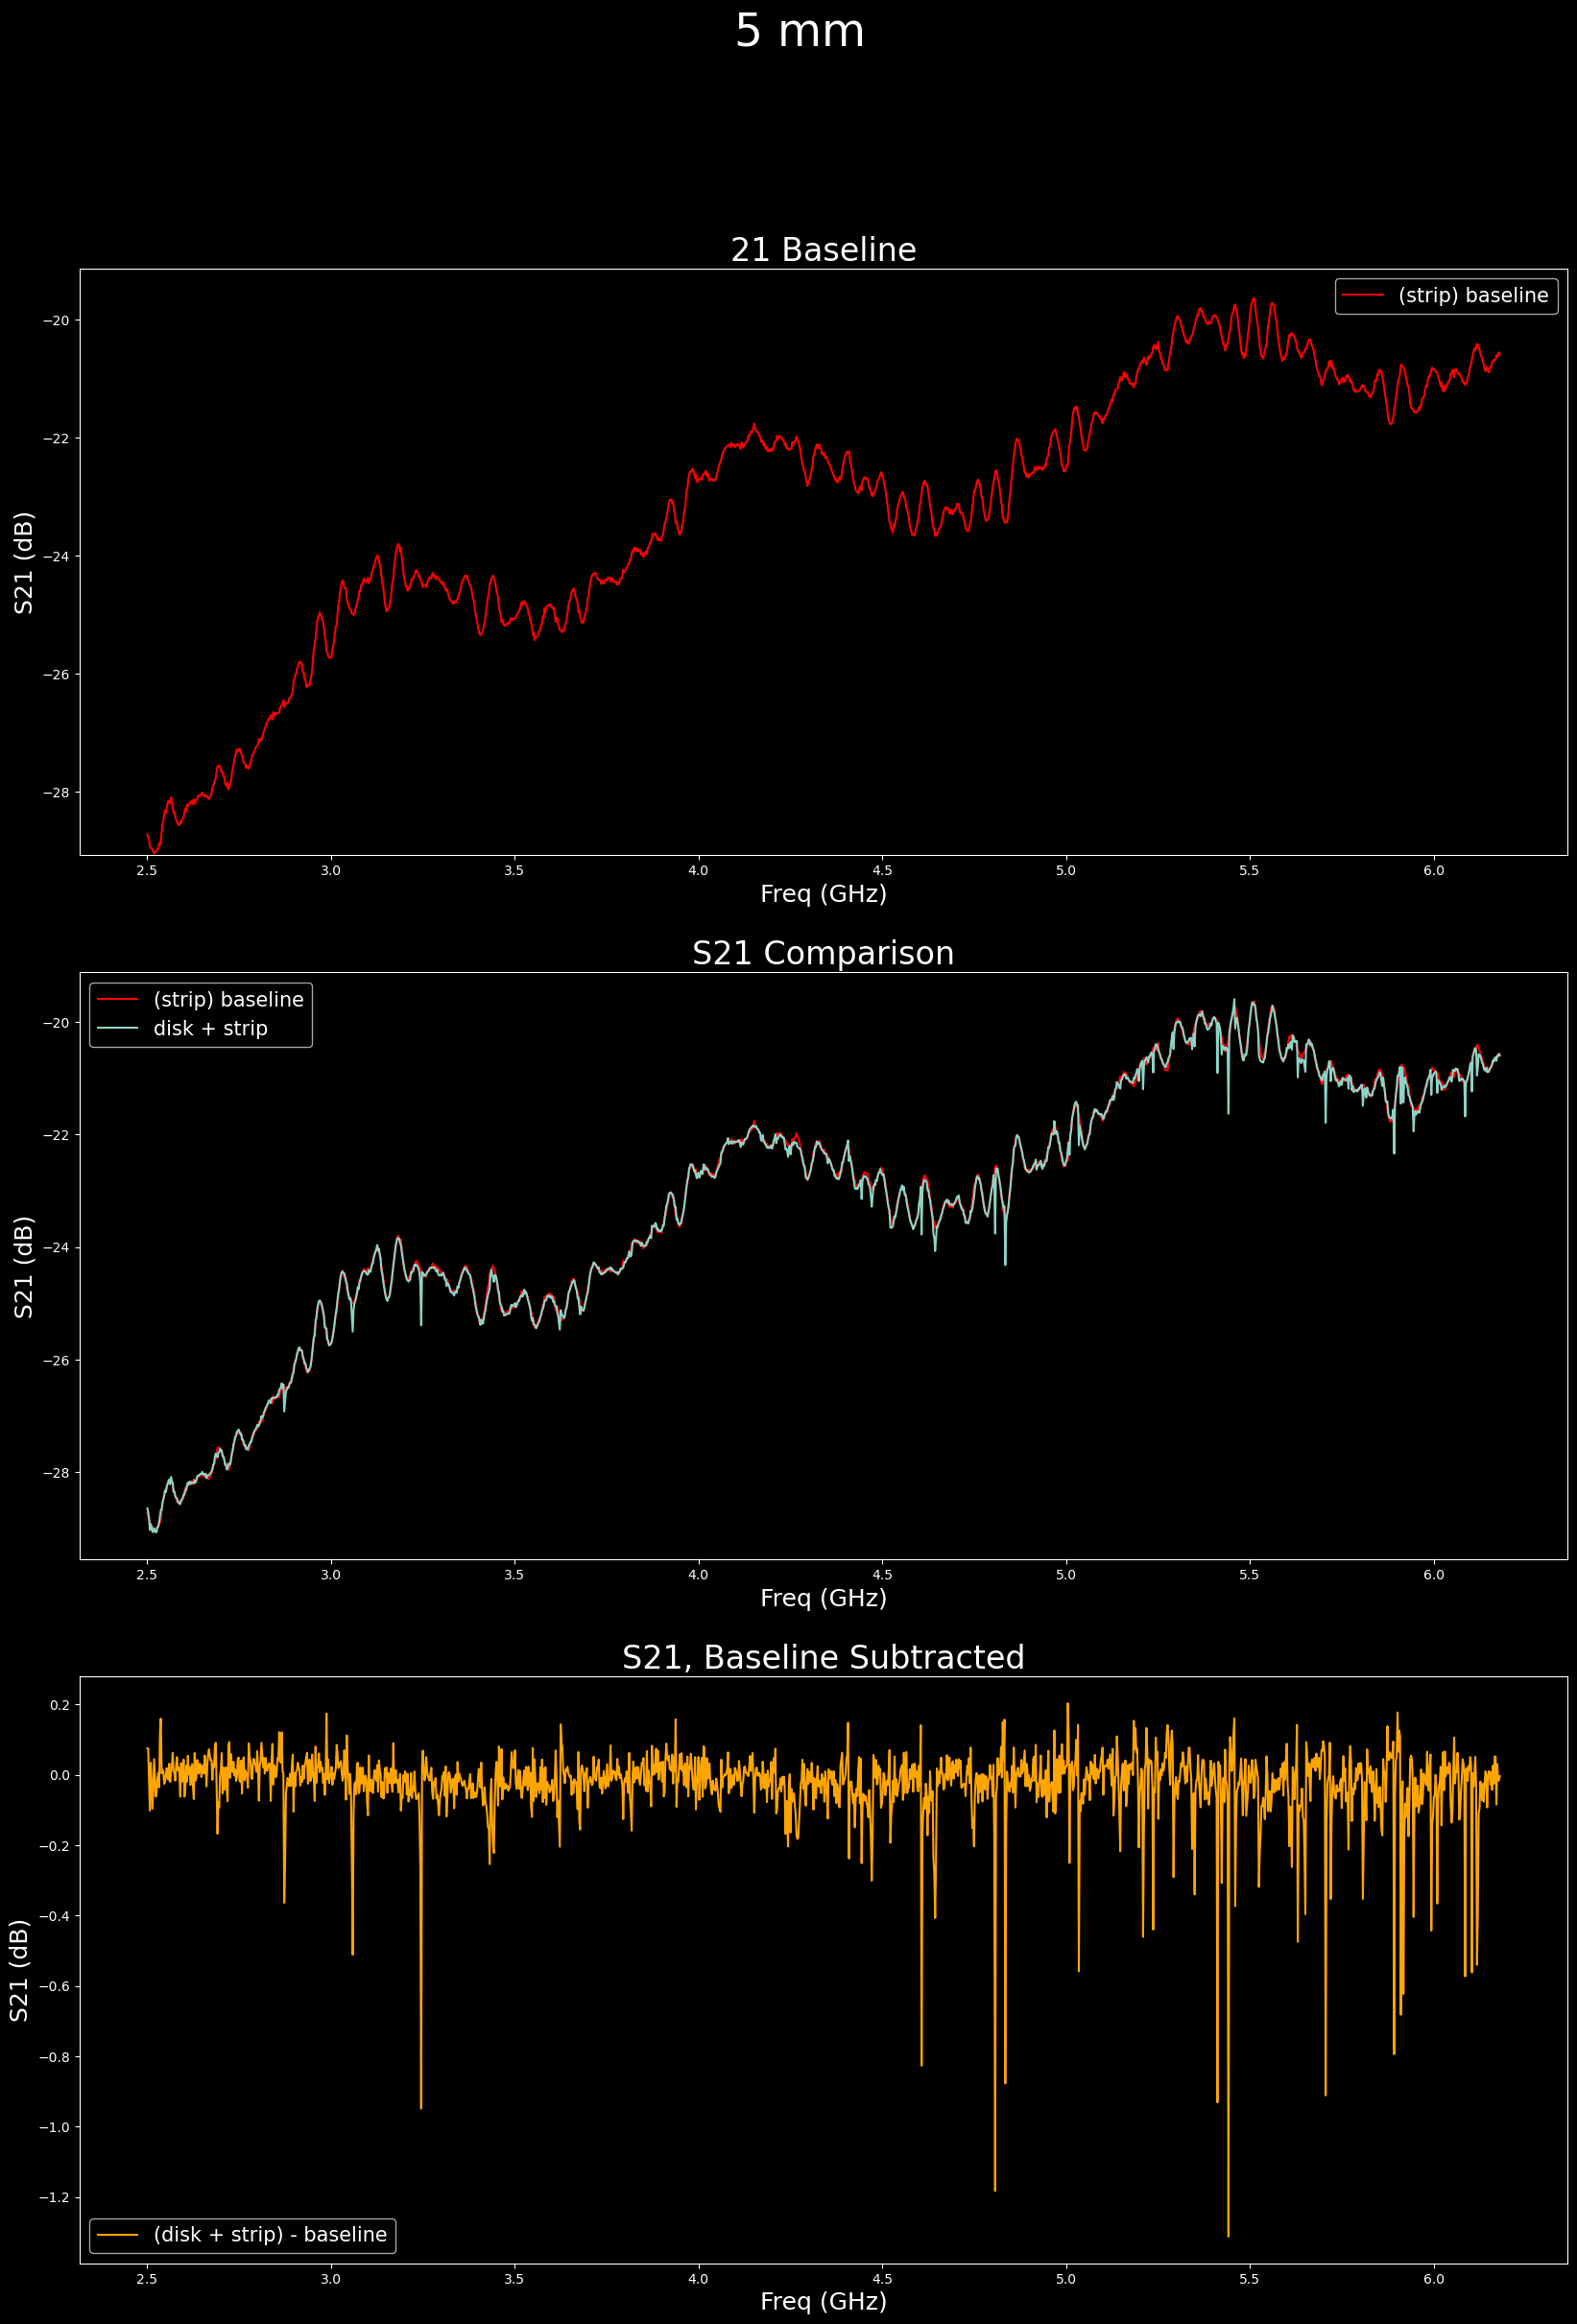

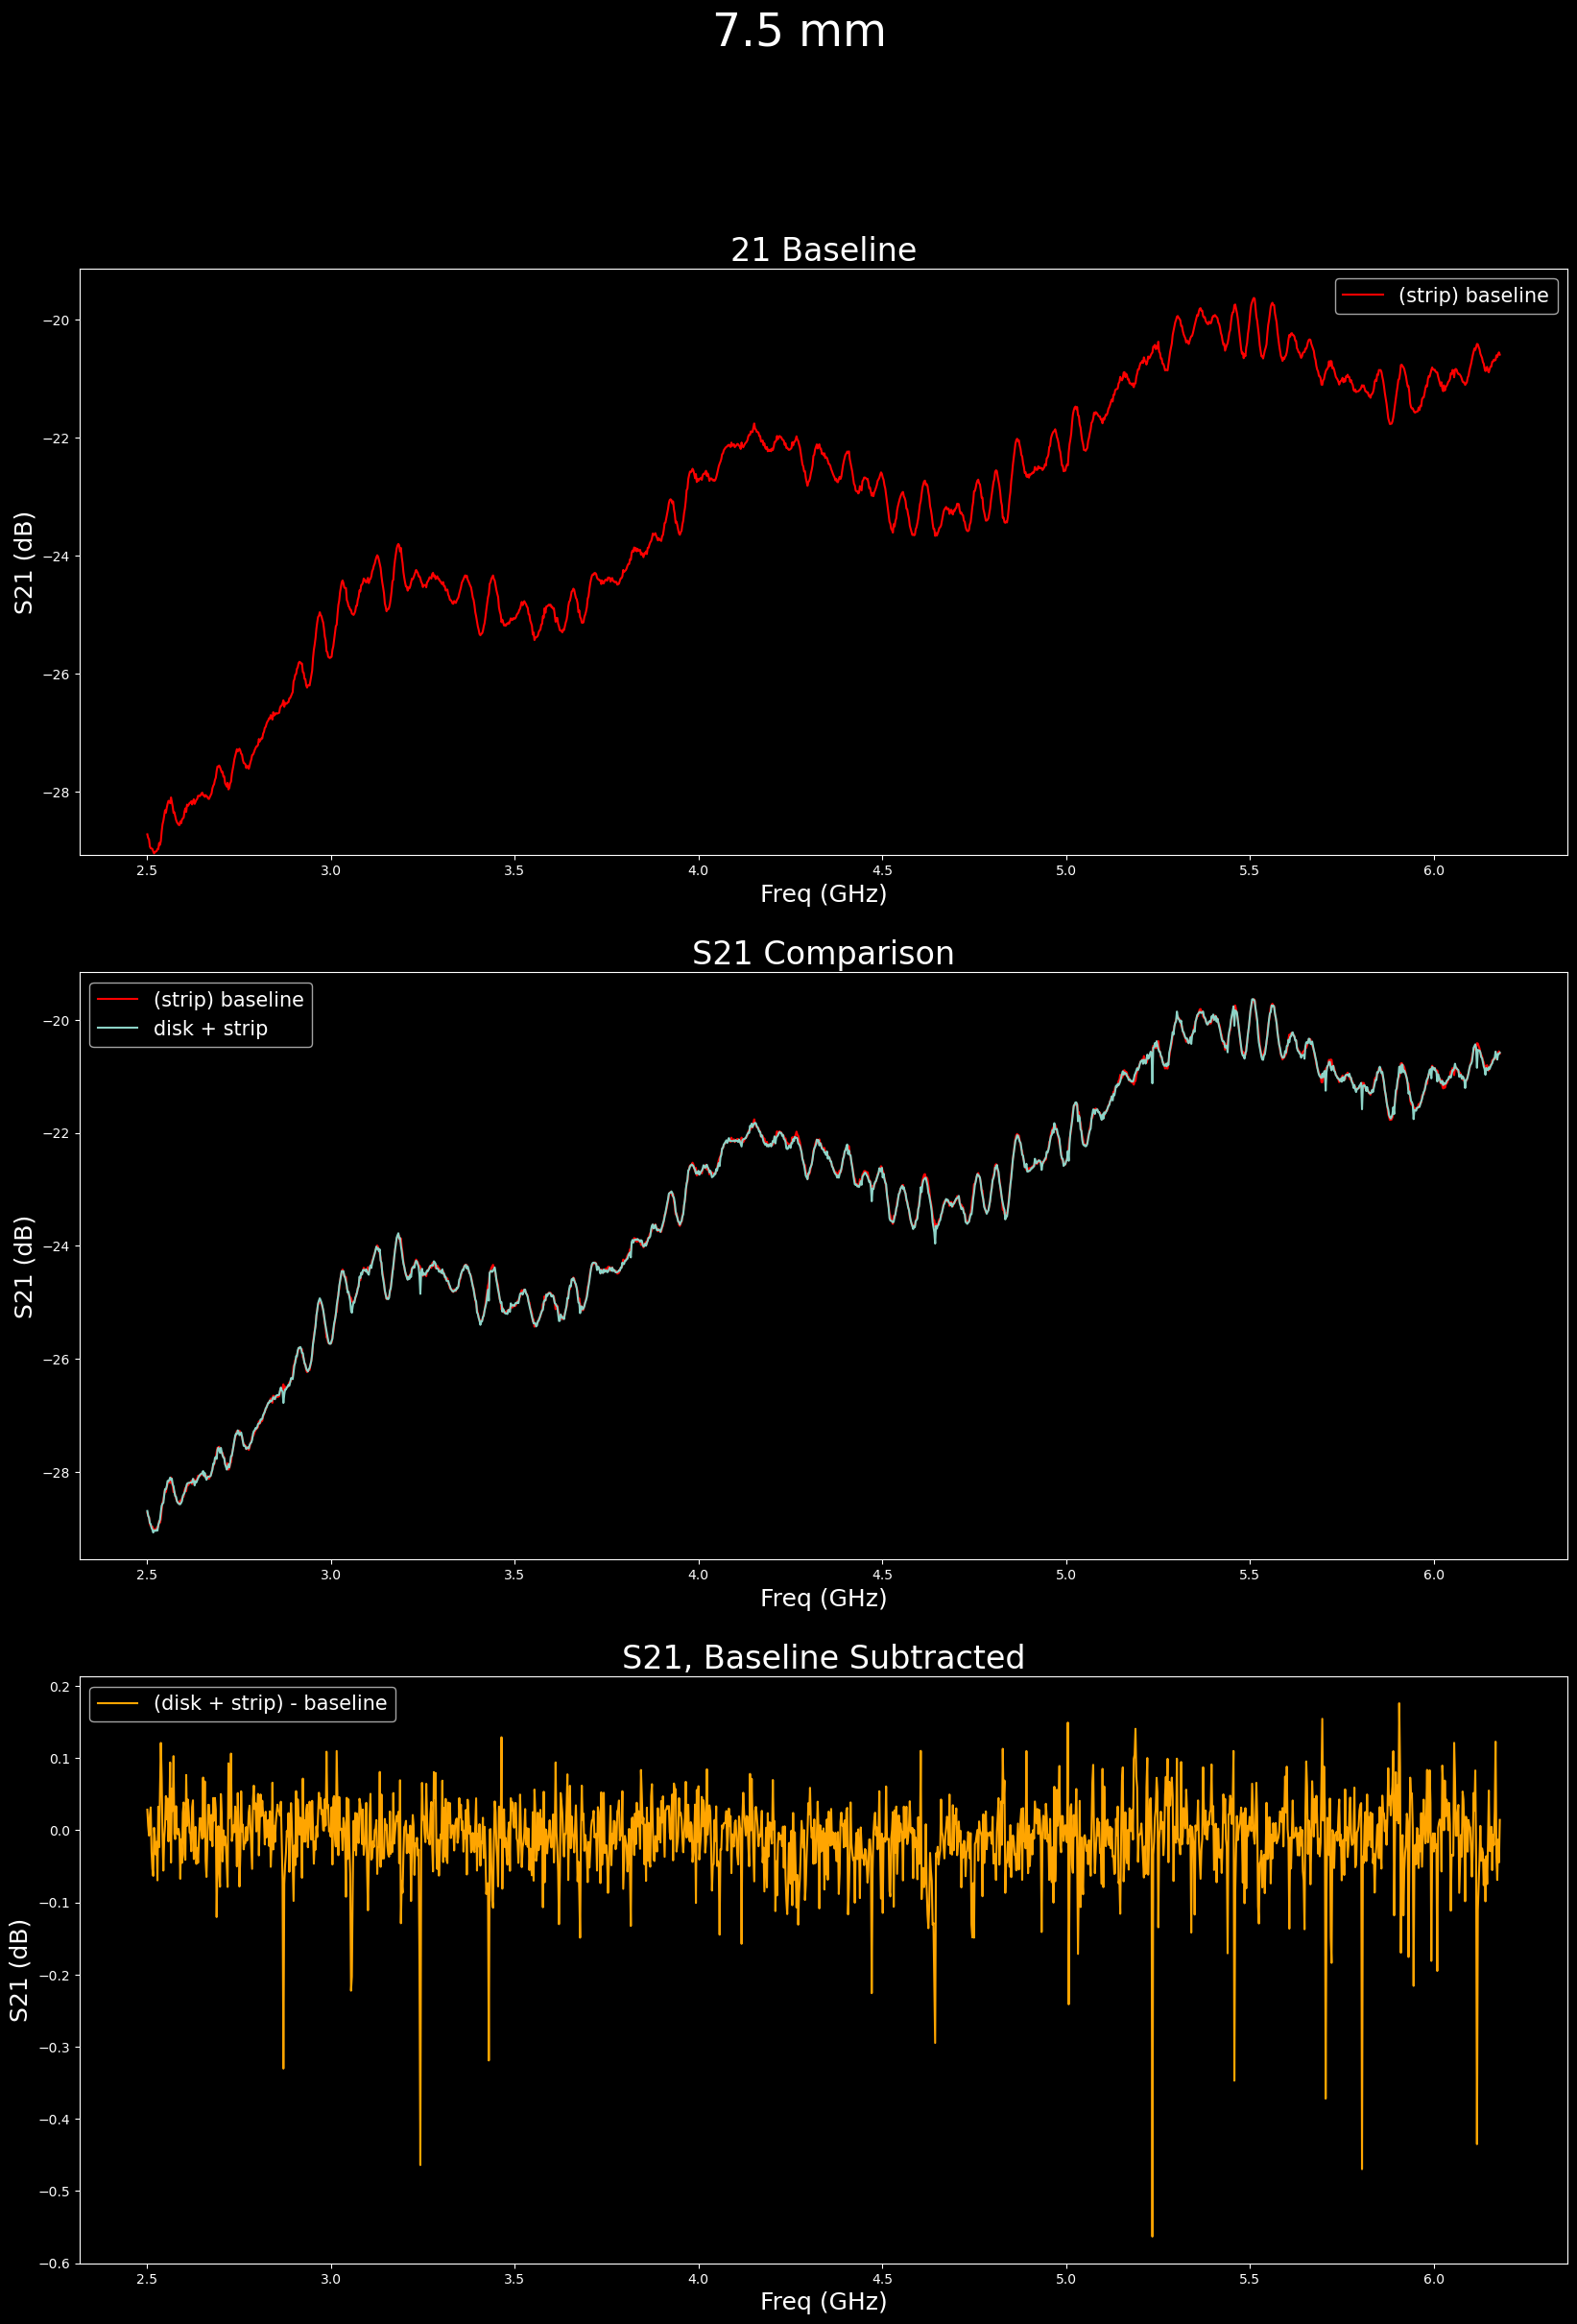

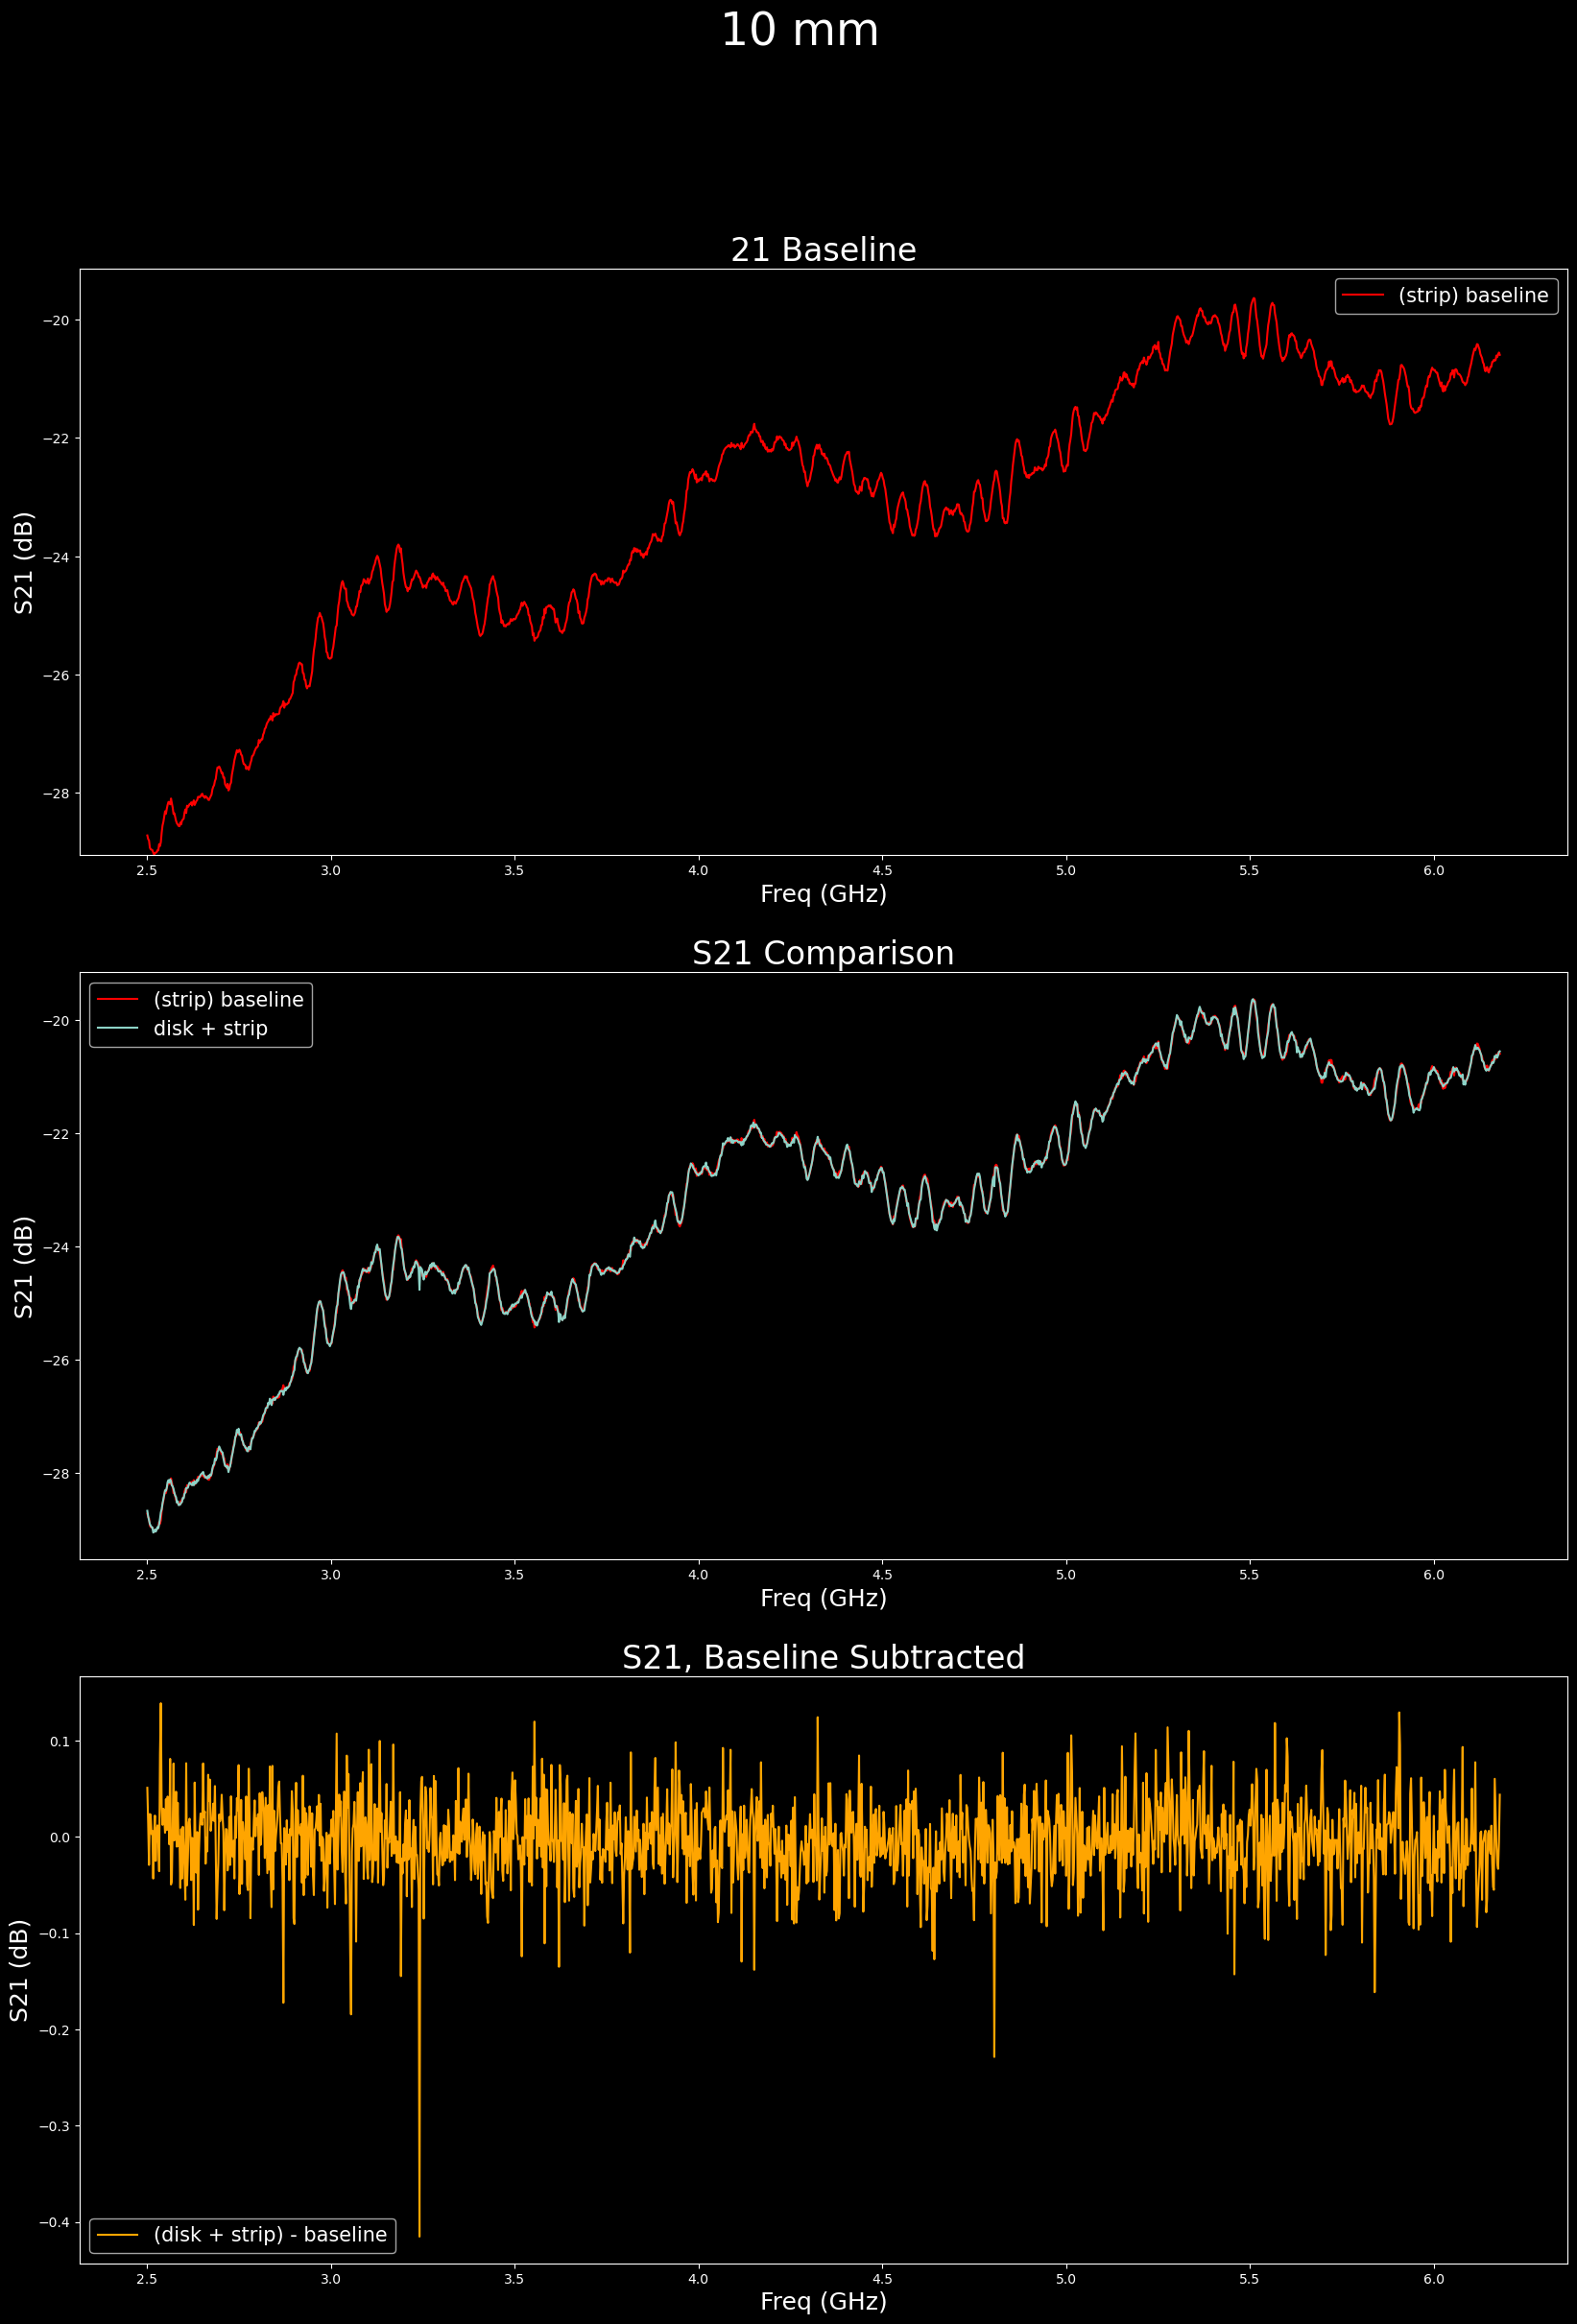

In [5]:
baseline, rot1_1p0 = vdr.loader_plotter('baseline1_060325_2.5to6.18GHz_2025-06-03_15-52-59.txt', 
                                    'rot1_1mm_2.5to6.18GHz_2025-06-03_16-23-55.txt', 
                                    'data/dist_rot_data_060325', title = '1 mm')


baseline, rot1_2p5 = vdr.loader_plotter('baseline1_060325_2.5to6.18GHz_2025-06-03_15-52-59.txt', 
                                    'rot1_2.5mm_2.5to6.18GHz_2025-06-03_15-45-09.txt', 
                                    'data/dist_rot_data_060325', title = '2.5 mm')

baseline, rot1_5p0 = vdr.loader_plotter('baseline1_060325_2.5to6.18GHz_2025-06-03_15-52-59.txt', 
                                    'rot1_5mm_2.5to6.18GHz_2025-06-03_15-47-10.txt', 
                                    'data/dist_rot_data_060325', title = '5 mm')


baseline, rot1_7p5 = vdr.loader_plotter('baseline1_060325_2.5to6.18GHz_2025-06-03_15-52-59.txt', 
                                    'rot1_7.5mm_2.5to6.18GHz_2025-06-03_15-49-54.txt', 
                                    'data/dist_rot_data_060325', title = '7.5 mm')


baseline, rot1_10p0 = vdr.loader_plotter('baseline1_060325_2.5to6.18GHz_2025-06-03_15-52-59.txt', 
                                    'rot1_10mm_2.5to6.18GHz_2025-06-03_15-51-29.txt', 
                                    'data/dist_rot_data_060325', title = '10 mm')
    

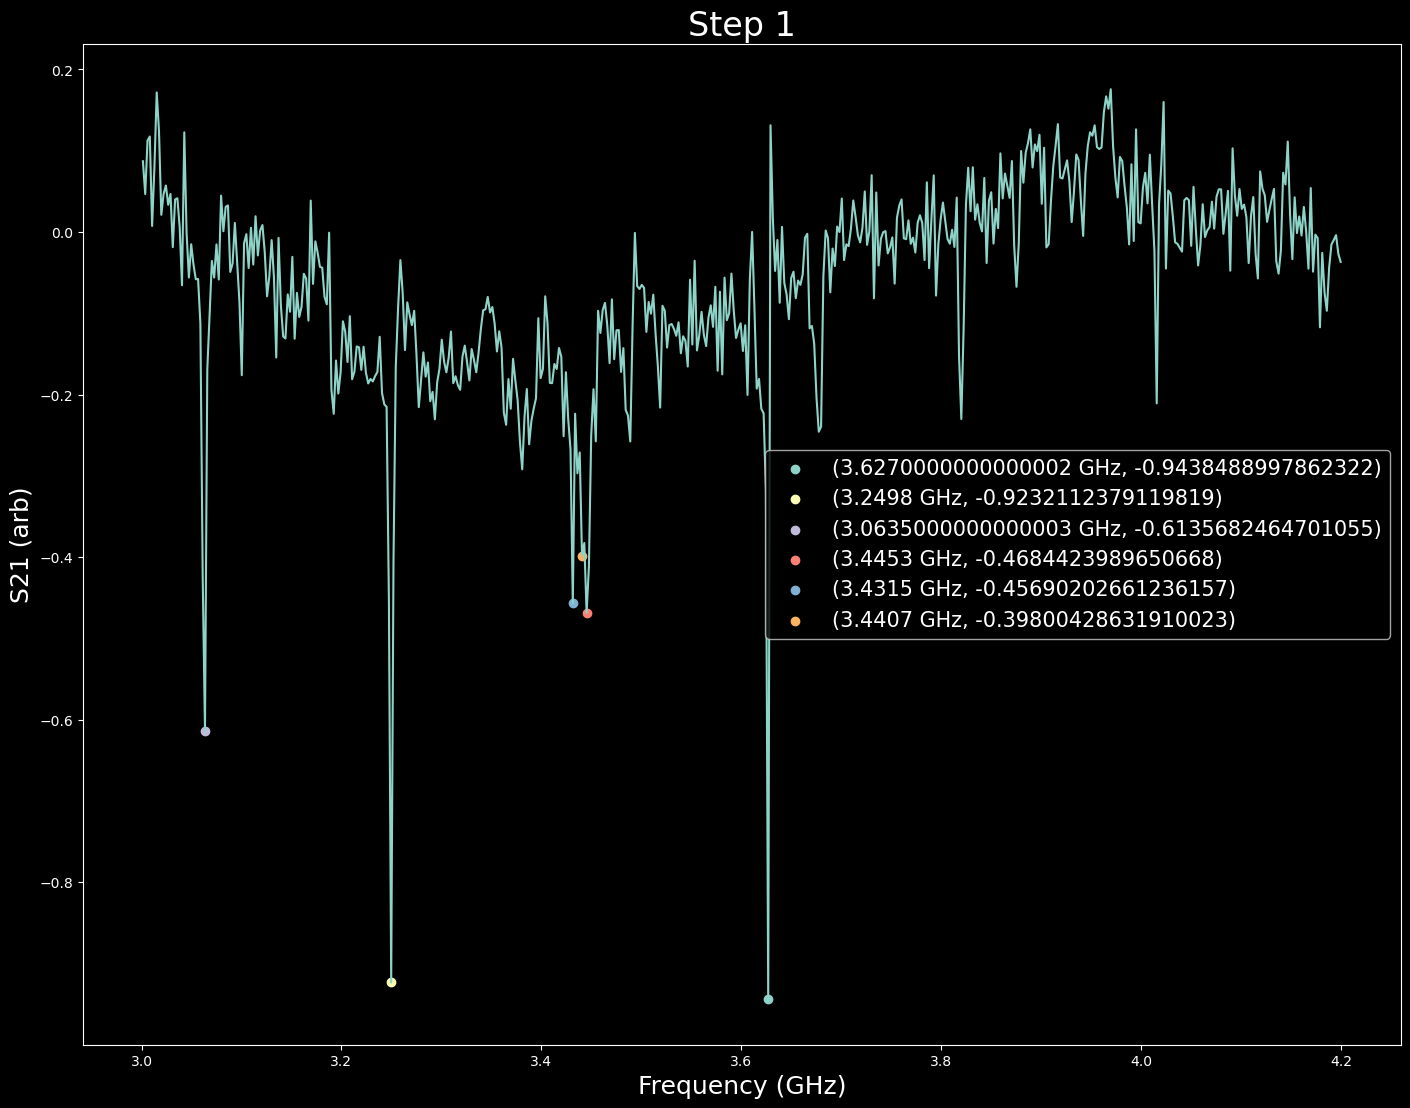

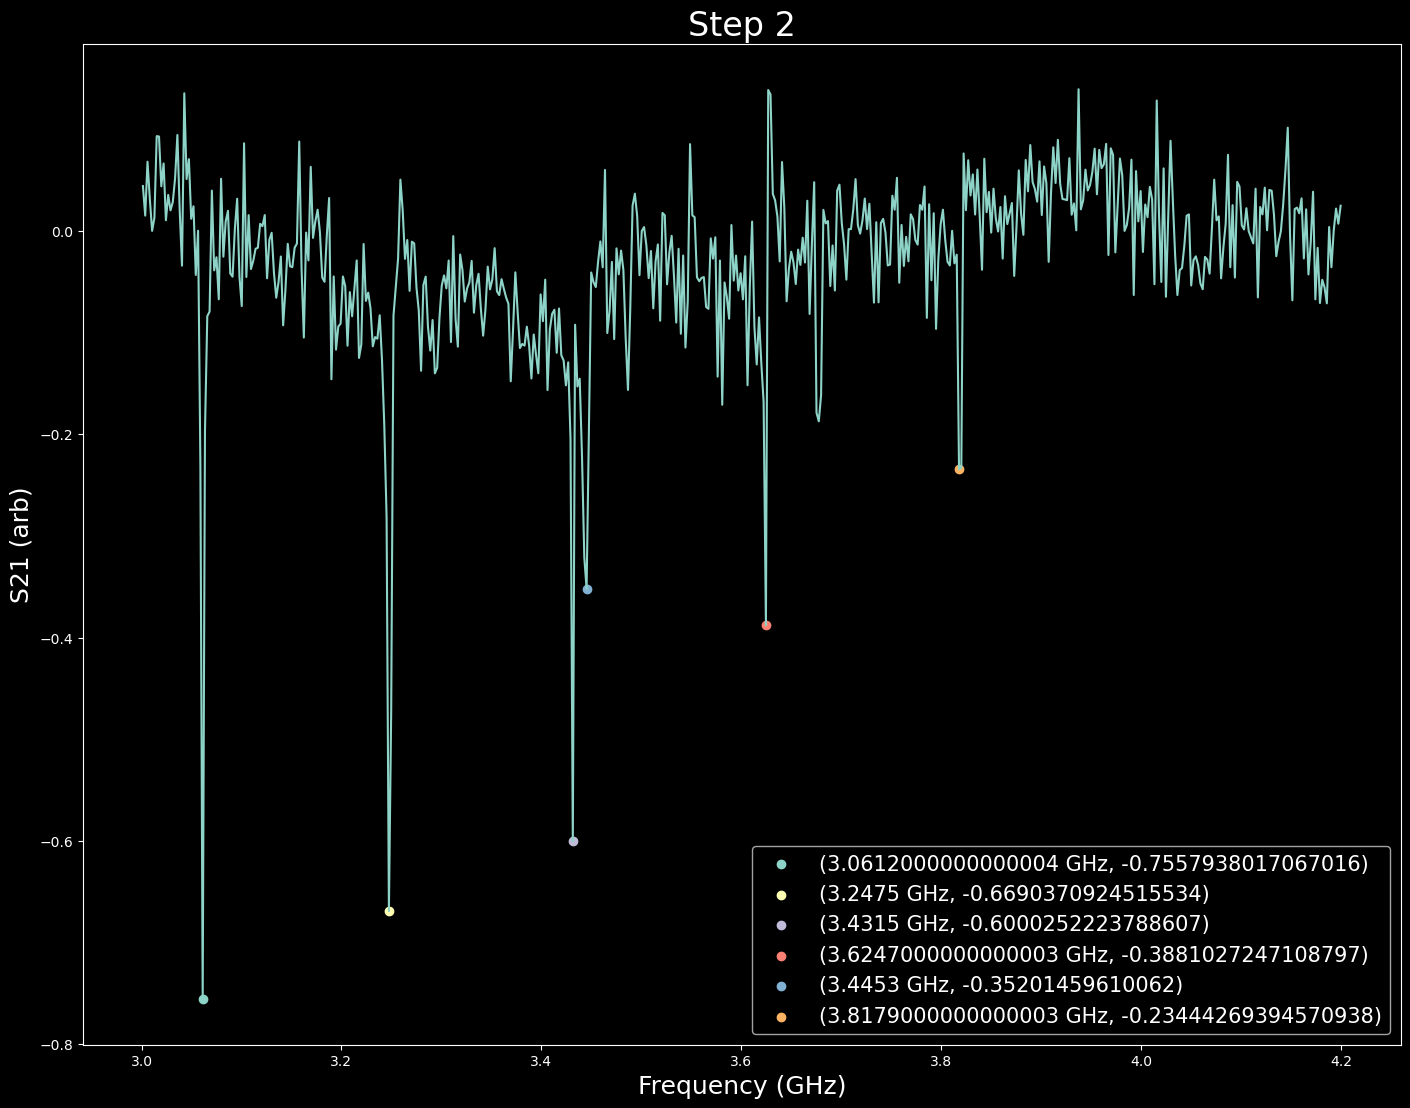

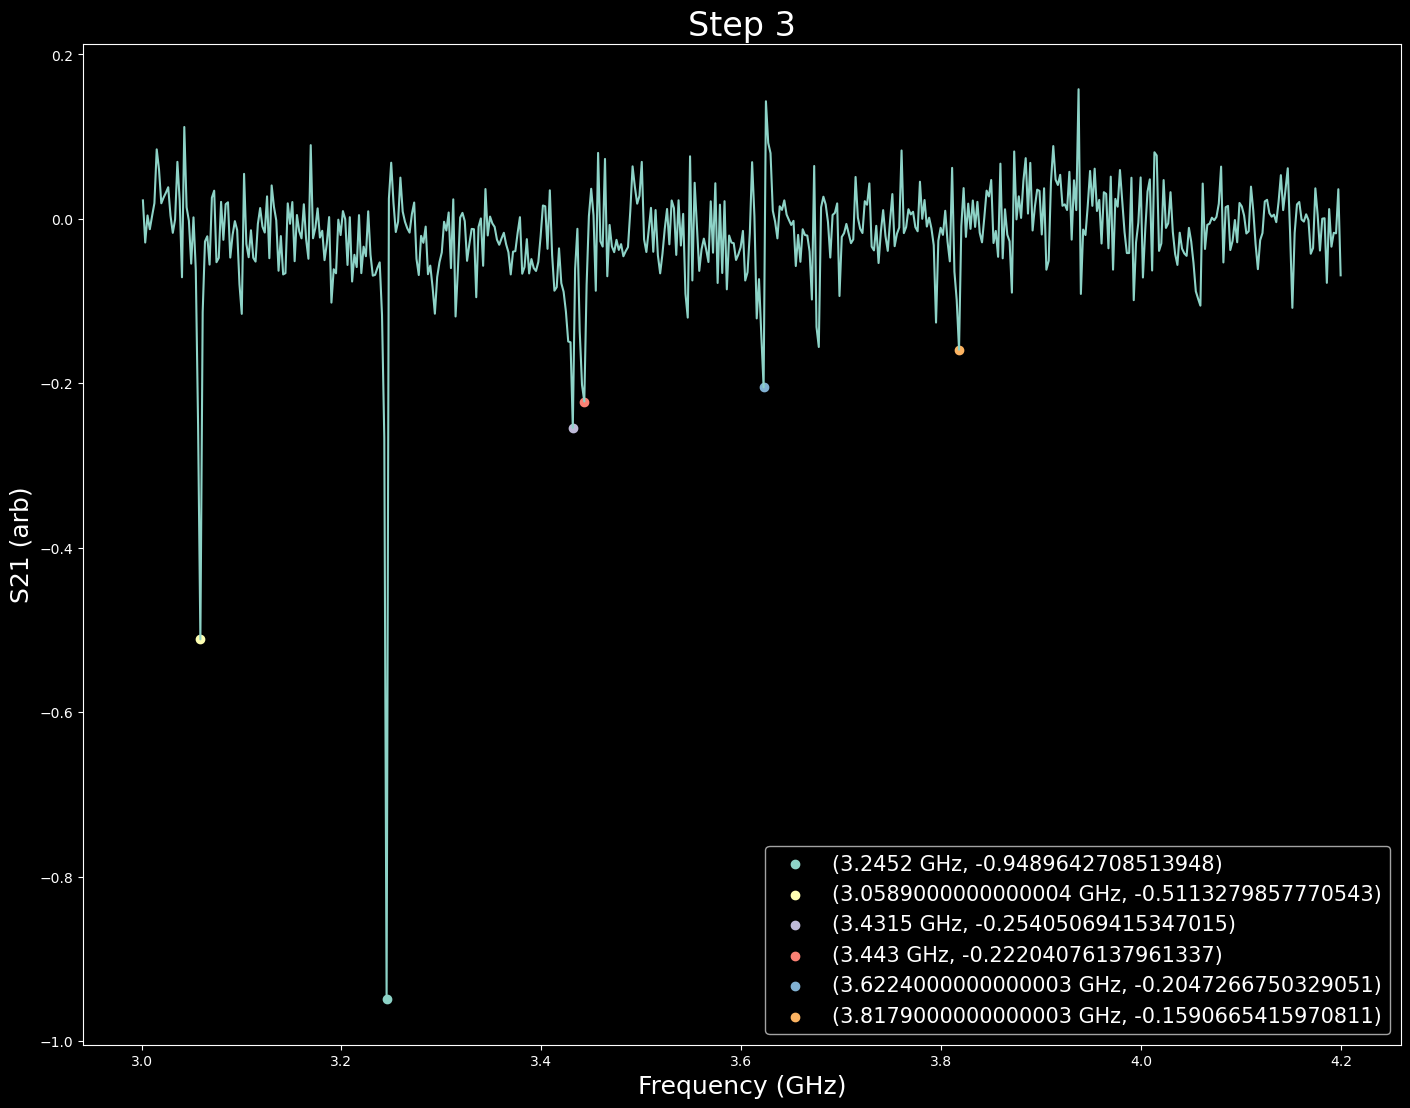

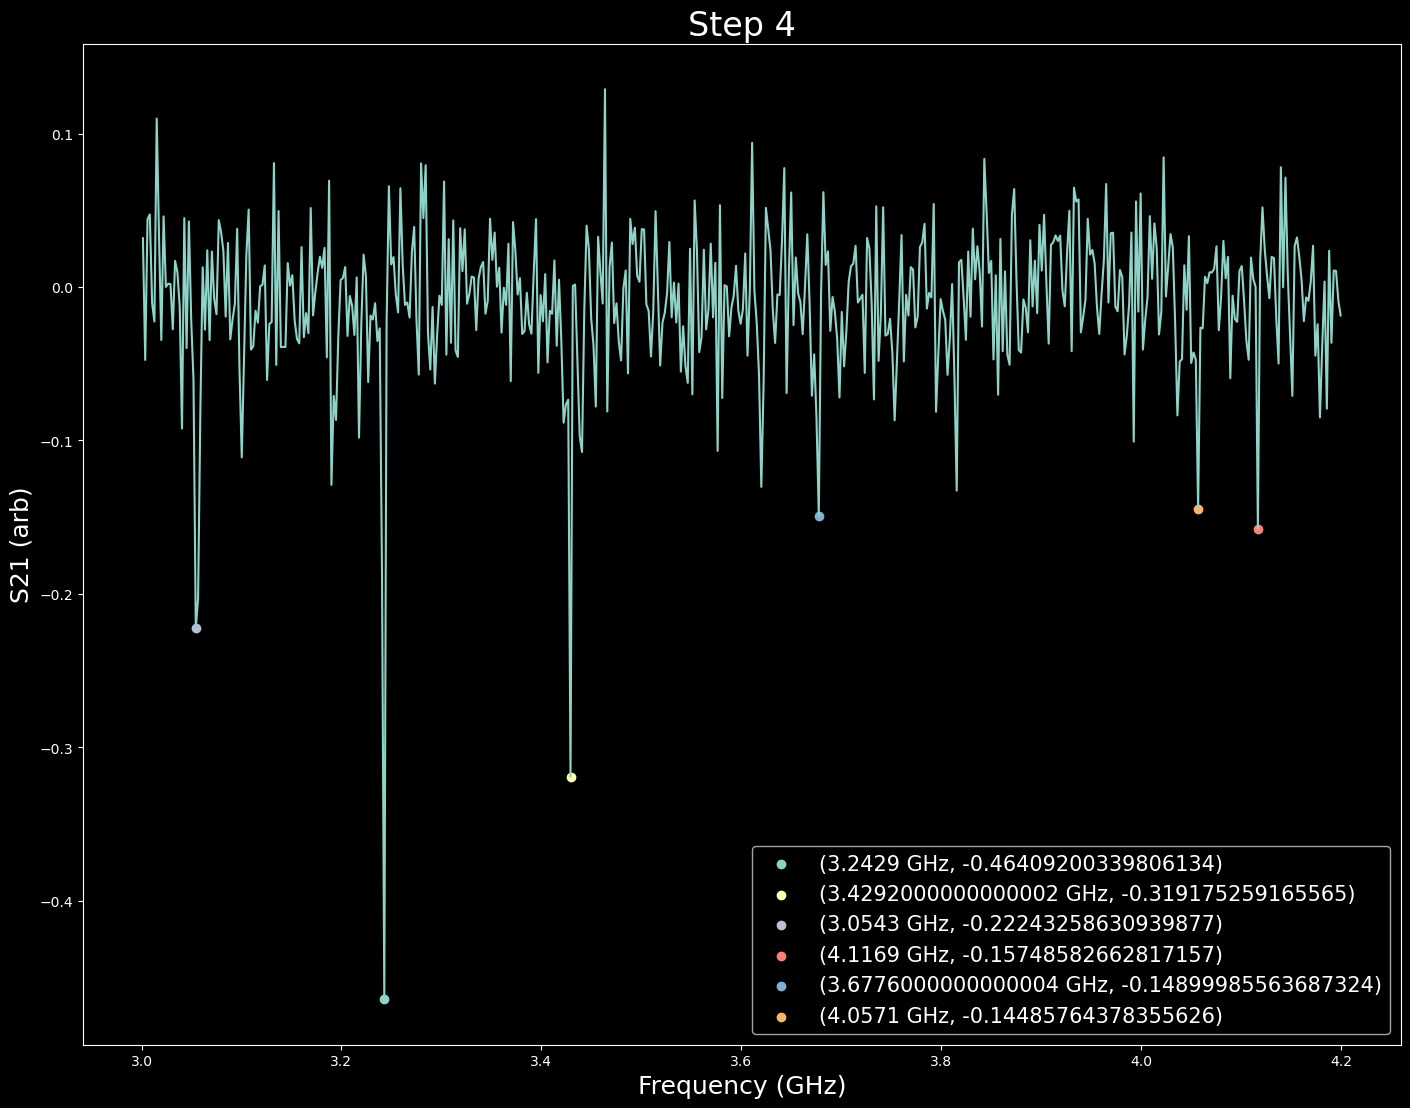

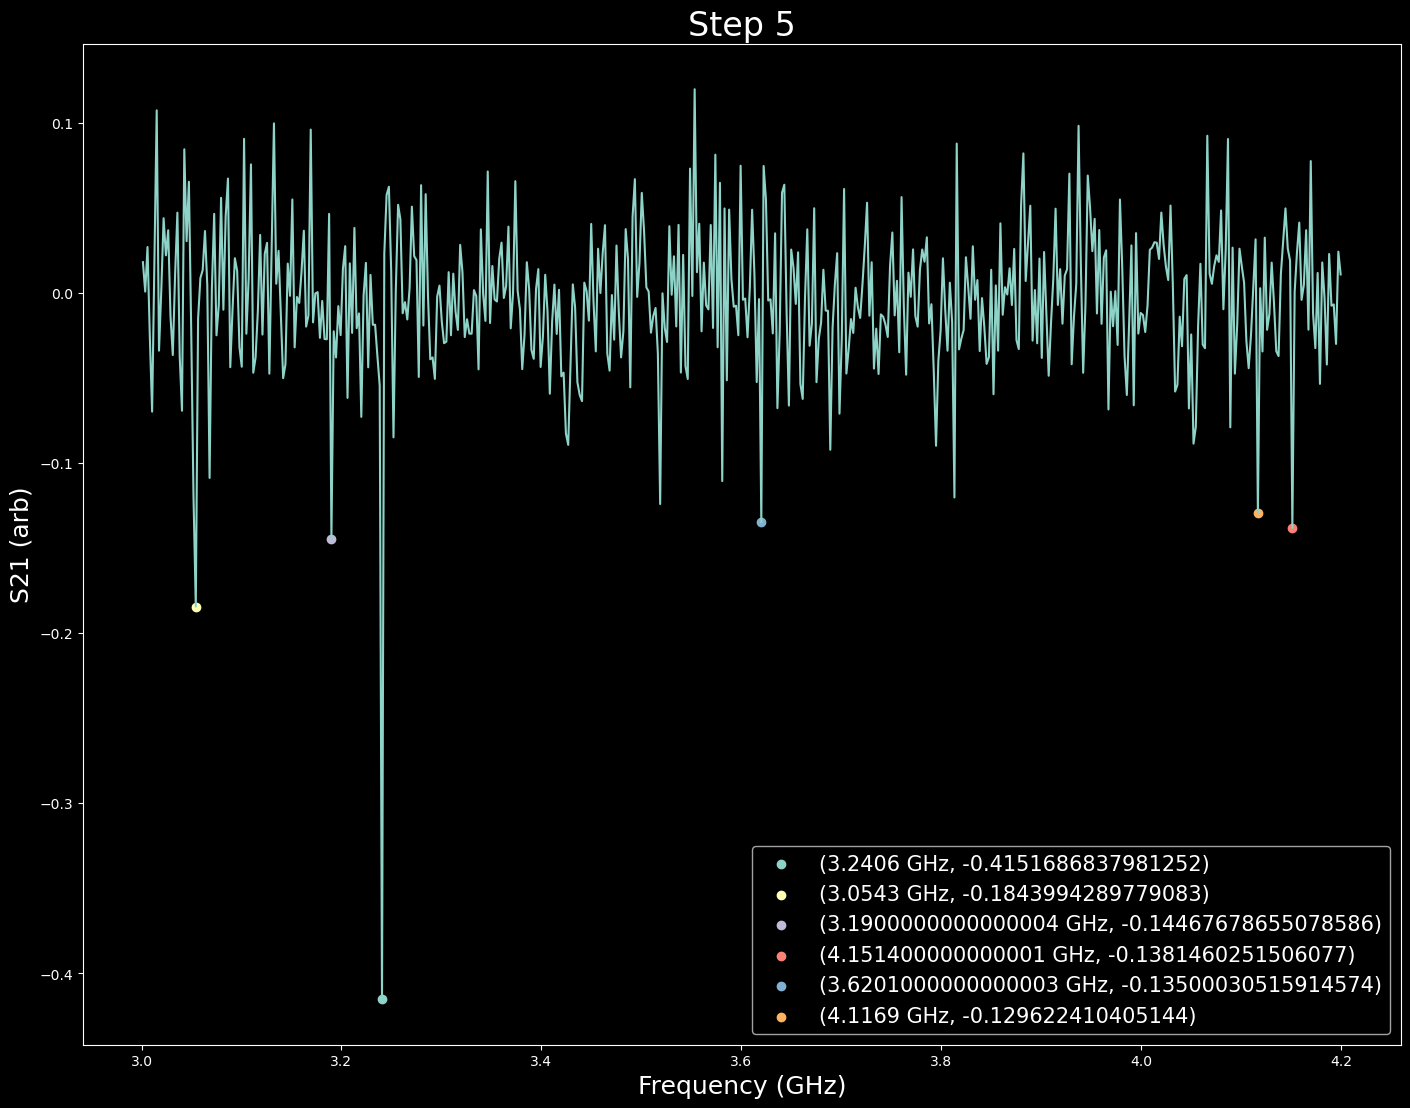

In [8]:
rot1_distances = [rot1_1p0, rot1_2p5, rot1_5p0, rot1_7p5, rot1_10p0]
for i in range(len(rot1_distances)): 
    S21_dips = uf.find_plot_dips(baseline, rot1_distances[i], n_dips = 6, f_start=3, 
                                 f_stop=4.2, title = 'Step ' + str(i + 1))